In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import string
import nltk   #natural laungauge toolkit(berfore reading the data you have to preprocess the data)----NLP preprocessing.
import nlp_utils as nu #To import NLP Algos in the dataset.

In [2]:
#pip install nltk
#pip install nlp_utils

In [3]:
#pip install nlp_utils

In [4]:
f=open("dialogs.txt","r")
print(f.read())

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [5]:
df=pd.read_csv("dialogs.txt",names=('Query','Response'),sep=('\t'))

In [6]:
df

Query  \
0                                hi, how are you doing?   
1                         i'm fine. how about yourself?   
2                   i'm pretty good. thanks for asking.   
3                     no problem. so how have you been?   
4                      i've been great. what about you?   
...                                                 ...   
3720    that's a good question. maybe it's not old age.   
3721                              are you right-handed?   
3722                                  yes. all my life.   
3723  you're wearing out your right hand. stop using...   
3724        but i do all my writing with my right hand.   

                                               Response  
0                         i'm fine. how about yourself?  
1                   i'm pretty good. thanks for asking.  
2                     no problem. so how have you been?  
3                      i've been great. what about you?  
4              i've been good. i'm in school right now.  
...                                                 ...  
3720                              are you right-handed?  
3721                                  yes. all my life.  
3722  you're wearing out your right hand. stop using...  
3723        but i do all my writing with my right hand.  
3724  start typing instead. that way your left hand ...  

[3725 rows x 2 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [8]:
df.shape

(3725, 2)

In [9]:
df.columns

Index(['Query', 'Response'], dtype='object')

In [10]:
df.isnull().sum()

Query       0
Response    0
dtype: int64

In [11]:
df['Response'].value_counts()

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3512, dtype: int64

In [12]:
df['Query'].value_counts()

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Query, Length: 3510, dtype: int64

In [13]:
#Sentiment Analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
Text=df['Query']

In [15]:
#nltk.download('vader_lexicon')  #Vader:-Valance Aware Dictionary and Sentiment Reasoner.

In [16]:
sid=SentimentIntensityAnalyzer()
for sentence in Text:
    print(sentence)
    
    ss=sid.polarity_scores(sentence)
    for k in ss:
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

hi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
good luck with school.
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
how's it going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm doing well. how about you?
neg: 0.0, neu: 0.704, pos: 0.2

In [17]:
analyzer=SentimentIntensityAnalyzer()
df['rating']=Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'],axis=1),df['rating'].apply(pd.Series)],axis=1)

In [18]:
df

Query  \
0                                hi, how are you doing?   
1                         i'm fine. how about yourself?   
2                   i'm pretty good. thanks for asking.   
3                     no problem. so how have you been?   
4                      i've been great. what about you?   
...                                                 ...   
3720    that's a good question. maybe it's not old age.   
3721                              are you right-handed?   
3722                                  yes. all my life.   
3723  you're wearing out your right hand. stop using...   
3724        but i do all my writing with my right hand.   

                                               Response    neg    neu    pos  \
0                         i'm fine. how about yourself?  0.000  1.000  0.000   
1                   i'm pretty good. thanks for asking.  0.000  0.690  0.310   
2                     no problem. so how have you been?  0.000  0.250  0.750   
3                      i've been great. what about you?  0.495  0.505  0.000   
4              i've been good. i'm in school right now.  0.000  0.549  0.451   
...                                                 ...    ...    ...    ...   
3720                              are you right-handed?  0.000  0.707  0.293   
3721                                  yes. all my life.  0.000  1.000  0.000   
3722  you're wearing out your right hand. stop using...  0.000  0.526  0.474   
3723        but i do all my writing with my right hand.  0.153  0.625  0.222   
3724  start typing instead. that way your left hand ...  0.000  0.650  0.350   

      compound  
0       0.0000  
1       0.2023  
2       0.8402  
3      -0.5994  
4       0.6249  
...        ...  
3720    0.4404  
3721    0.0000  
3722    0.4019  
3723    0.2500  
3724    0.6486  

[3725 rows x 6 columns]

In [19]:
#pip install WordCloud

In [20]:
from wordcloud import WordCloud

In [21]:
def wordcloud(df,label):
    
    subset=df[df[label]==1]  #---------only one label can call
    text=df.Query.values
    wc=WordCloud(background_color="black",max_words=1000)
    
    wc.generate("".join(text))
    
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label),fontsize=20)
    plt.imshow(wc.recolor(colormap='gist_earth',random_state=244),alpha=0.98) #----alpha stands for trasperancy
    
    

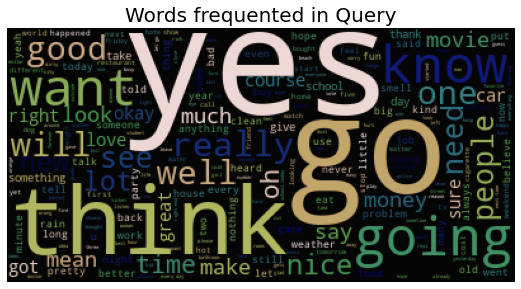

In [22]:
wordcloud(df,'Query')

In [23]:
#Application of Chatbot:
#we now read to write a code that will help us to make a chatbot application work

from sklearn.metrics.pairwise import cosine_distances
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
factors=tfidf.fit_transform(df['Query']).toarray()

#We have applied tfidfvectorizer and did the fittransform to convert query into array.

    

In [24]:
def chatbot(query):#cleaning then //  word embedding:-embedd every query with the response and then will get faster response by bot
    query_vector=tfidf.transform([query]).toarray()  #cosine similarity 
    similar_score=1-cosine_distances(factors,query_vector)
    index=similar_score.argmax()               #search for the closest match.
    matching_question=df.loc[index]['Query']   #locate index based upon a query.means locating up the max index regards to the query
    response=df.loc[index]['Response']
    pos_score=df.loc[index]['pos']
    neg_score=df.loc[index]['neg']
    neu_score=df.loc[index]['neu']
    confidence=similar_score[index][0]
    chat_dict={'match':matching_question,
              'response':response,
              'score':confidence,
              'pos':pos_score,
              'neg':neg_score,
              'neu':neu_score}
    return chat_dict

In [25]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

USER: colgate
BOT: Please rephrase your Question.
USER: how are you
logs:
 Matched Question: 'how are you doing that?'
 Confidence Score: 68.07 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  i started shopping at the dollar store.
USER: ok
BOT: Please rephrase your Question.
USER: lets go outside
logs:
 Matched Question: 'i hate to go outside.'
 Confidence Score: 75.27 
 PositiveScore: 0.0 
 NegativeScore: 0.552
 NeutralScore: 0.448
BOT:  me too.
USER: exit


In [26]:
#Text Normalization: THIS PART IS FIRST----we are preprocessing the data  (we will use lambda function in it )

import re


In [27]:
#Covert all the text into lowercase:

punc_lower=lambda x:re.sub('[%s]' %re.escape(string.punctuation),' ',x.lower)

In [28]:
remove_n=lambda x: re.sub("\n"," ",x)

#removing \n and replacing with the empty values 

In [29]:
pd.set_option('display.max_rows',3800)

#Displaying all rows in the dataset

In [30]:
df

Query  \
0                                hi, how are you doing?   
1                         i'm fine. how about yourself?   
2                   i'm pretty good. thanks for asking.   
3                     no problem. so how have you been?   
4                      i've been great. what about you?   
5              i've been good. i'm in school right now.   
6                             what school do you go to?   
7                                          i go to pcc.   
8                                 do you like it there?   
9                  it's okay. it's a really big campus.   
10                               good luck with school.   
11                                      how's it going?   
12                       i'm doing well. how about you?   
13                                never better, thanks.   
14                         so how have you been lately?   
15                 i've actually been pretty good. you?   
16                    i'm actually in school right now.   
17                          which school do you attend?   
18                         i'm attending pcc right now.   
19                           are you enjoying it there?   
20       it's not bad. there are a lot of people there.   
21                                 good luck with that.   
22                             how are you doing today?   
23                     i'm doing great. what about you?   
24                    i'm absolutely lovely, thank you.   
25                     everything's been good with you?   
26           i haven't been better. how about yourself?   
27                           i started school recently.   
28                       where are you going to school?   
29                                    i'm going to pcc.   
30                           how do you like it so far?   
31    i like it so far. my classes are pretty good r...   
32                              it's an ugly day today.   
33                         i know. i think it may rain.   
34    it's the middle of summer, it shouldn't rain t...   
35                                 that would be weird.   
36    yeah, especially since it's ninety degrees out...   
37    i know, it would be horrible if it rained and ...   
38                                   yes, it would be.    
39           i really wish it wasn't so hot every day.    
40                   me too. i can't wait until winter.   
41    i like winter too, but sometimes it gets too c...   
42                         i'd rather be cold than hot.   
43             it doesn't look very nice outside today.   
44      you're right. i think it's going to rain later.   
45    in the middle of the summer, it shouldn't be r...   
46                            that wouldn't seem right.   
47    considering that it's over ninety degrees outs...   
48    exactly, it wouldn't be nice if it started rai...   
49                     i know, you're absolutely right.   
50                    i wish it would cool off one day.   
51       that's how i feel, i want winter to come soon.   
52    i enjoy the winter, but it gets really cold so...   
53    i know what you mean, but i'd rather be cold t...   
54                     i wish it was a nicer day today.   
55                that is true. i hope it doesn't rain.   
56        it wouldn't rain in the middle of the summer.   
57    it wouldn't seem right if it started raining r...   
58    it would be weird if it started raining in nin...   
59               any rain right now would be pointless.   
60                    that's right, it really would be.   
61                         i want it to cool down some.   
62    i know what you mean, i can't wait until it's ...   
63    winter is great. i wish it didn't get so cold ...   
64                                it's such a nice day.   
65                                          yes, it is.   
66                      it looks like it may rain soon.   
67                        yes, and i h

In [31]:
pos_sent=df.sort_values(by='pos',ascending=False)
#Arranging the dataframe into the postive column into the descending order to find the best pos sentence.

In [32]:
pos_sent

Query  \
1659                                            please?   
1191                                               yes.   
223                              well, congratulations.   
2745                                           i agree.   
3583                                              sure.   
2730                                               yes?   
300                                             thanks.   
1258                                           i agree.   
980                                                yes?   
2434                                               yes.   
245                      that's great. congratulations.   
471                                  wow, how exciting.   
3319                               yes, it's beautiful.   
2930                              i certainly hope not!   
3166                                   i hope they fit.   
2141                               i like a good story.   
1847                                   i sure hope not.   
2613                                    i sure hope so.   
337                      well, superbad is super funny.   
659                                  well, that's cool.   
3043                                     i love cheese.   
2441                                   i love baseball.   
3109                                    i love peanuts.   
3032                                     i love salads.   
2222                                        i love you.   
3056                                        i loved it!   
1968                                      that's great.   
612                                  well, that's okay.   
290                    i wish i had a talent like that.   
1008                             yes, i would love one.   
353                                          what kind?   
1147                                         what kind?   
2013                            i hope i win the lotto.   
287                           yeah, i loved that class.   
2195                                        she's cute.   
2285                              yes, it was pleasant.   
2                   i'm pretty good. thanks for asking.   
918                                          who cares?   
10                               good luck with school.   
21                                 good luck with that.   
2332                              that sounds like fun.   
1102                                 but i love coffee.   
209                                         get better.   
1230                                      you're funny.   
648                               that sounds like fun.   
200                             i hope you feel better.   
853                                   but i love pizza.   
1489                         i wish i was really smart.   
2096                she loves you, yeah, yeah, yeah!...   
627                                        that's nice.   
2462                           yes. that's a good idea.   
1216                                        i liked it.   
1186                                       that's nice.   
1153                             yes, that sounds nice.   
3040                               yes, cheese is nice.   
2348                  a great burger and great service.   
1574                                         yes, i do.   
3561                                           oh, yes.   
246                                  i appreciate that.   
3572                                         yes, i do.   
925                                         yes, i did.   
3209                                        yes, i did.   
311                                  i appreciate that.   
1013                                 they trust in god.   
1689                                        yes, i did.   
1112                                        yes, i did.   
283                                          yes, i do.   
740                                   

In [33]:
neg_sent=df.sort_values(by='neg',ascending=False)
#Arranging the dataframe into the negative column into the descending order to find the best neg sentence.

In [34]:
neg_sent

Query  \
1294                                                no.   
2378                                                no.   
154                                         no problem.   
3095                             no, i hate vegetables.   
13                                never better, thanks.   
2758                                     i hate flying.   
968                                     i hate shaving.   
1664                                   i hate homework.   
998                                       i hate shots.   
3089                                   no, i'm serious.   
2257                                   no, i'm serious.   
2833                                     only a threat?   
2382                                 that's disgusting.   
202                                         i was sick.   
2294                                  that's dangerous.   
3099                                      what's wrong?   
1692                                          how rude.   
2292                                       that's rude.   
3649                                      pimples suck.   
675                                       that's harsh.   
1547                                 that's ridiculous!   
1931                                     but i stopped!   
1474                                      poetry sucks.   
331                  i couldn't help laughing, either.    
2372                                      you're crazy.   
633                        i don't really like parties.   
2610                but his latest fire killed someone.   
161                                      no, i haven't.   
219                                      no, i haven't.   
2724                               no pets, no smoking.   
1386                                       i'm worried.   
1085                                     no, i haven't.   
487                                       no, i didn't.   
788                                       no, i didn't.   
447                                  no, i had no idea.   
2138                         and there was no violence.   
805                                          i'm bored.   
2598                                        did he die?   
1173                           oh, no. that's bad news.   
2591                            there is no crime here.   
2698                  a recent fire destroyed 85 homes.   
3554                         paper cuts can hurt a lot.   
2791                                     i hate to fly.   
1435                              criminals, of course.   
193                       i wasn't really feeling well.   
1023                                   my husband died.   
1035                                  that's a bad day.   
1060                                    that's too bad.   
3527                                   my fingers hurt.   
2618                            but it's uncomfortable.   
1061                      my mother was hurt and angry.   
434                             it's no trouble at all.   
1862                         no, the police don't care.   
1548                       you don't like pretty women?   
3553                                     it hurts, too.   
3563                                  it smells so bad.   
507   it's no problem. i was really missing you anyway.   
1022                        i don't want to go to hell.   
3444                             he hates corporations.   
3580                       no, i don't like nose drops.   
498                          no, i didn't feel like it.   
2601                              the battery was dead.   
424                    no, i didn't go, i've been sick.   
1021  if we are bad, we will be unhappy forever in h...   
829                               it's not comfortable.   
1360                                      did he crash?   
2793                      no, because it hurts my ears.   
2832            there was a bomb threa